In [1]:
import numpy as np
from keras.datasets import boston_housing
from keras import models
from keras import layers
import matplotlib.pyplot as plt


# load the data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


# prepare the data (normalizing the data)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

x_train = (X_train - mean) / std
x_test = (X_test - mean) / std


# build the NN
def build_network():
  network = models.Sequential()
  network.add(layers.Dense(64, activation = 'relu', input_shape=(x_train.shape[1],)))
  network.add(layers.Dense(64, activation = 'relu'))
  network.add(layers.Dense(1))
  # choose loss function, optimizer, and target metrics
  network.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return network


# k-fold cross validation 
k = 4
num_val = len(x_train) // k
num_epochs = 500
all_mae = []

for i in range(k):
  # partition train data into training set and validation set
  x_val = x_train[i * num_val : (i + 1) * num_val]
  y_val = y_train[i * num_val : (i + 1) * num_val]
  
  partial_x_train = np.concatenate([x_train[:i * num_val], 
                                    x_train[(i + 1) * num_val:]], 
                                    axis=0)
  partial_y_train = np.concatenate([y_train[:i * num_val],
                                    y_train[(i + 1) * num_val:]],
                                    axis=0)
  
  # train the NN
  network = build_network()
  history = network.fit(partial_x_train, partial_y_train,
                        validation_data = (x_val, y_val),
                        epochs=num_epochs, batch_size = 1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae.append(mae_history)



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


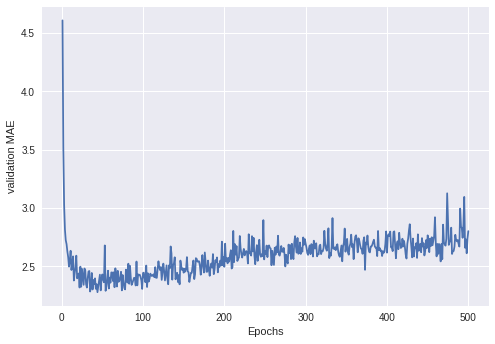

In [2]:
# plot validation MAE

average_mae_history = [np.mean([x[i] for x in all_mae]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('validation MAE')
plt.show()

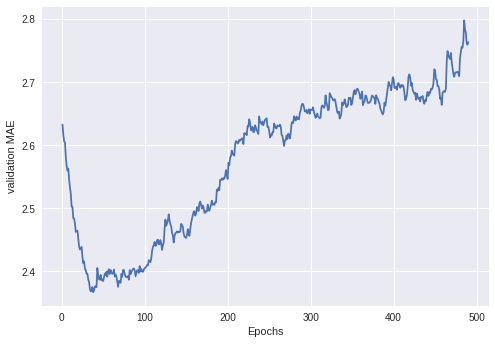

In [3]:
# to see the plot better, we can omit the first 10 point and replace each point
# with an exponential moving average of the previous points.

average_mae_history = [np.mean([x[i] for x in all_mae]) 
                       for i in range(num_epochs)]

import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smoothed_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smoothed_mae_history) + 1), smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('validation MAE')
plt.show()

In [4]:
# after about 80 epochs, overfitting starts.
# so we train NN from scratch for 80 epochs and using all training set 

network = build_network()
network.fit(x_train, y_train, epochs = 80, batch_size=16)

Epoch 1/80
404/404 [==============================] - 0s 722us/step - loss: 497.9899 - mean_absolute_error: 20.2080
Epoch 2/80
404/404 [==============================] - 0s 80us/step - loss: 322.4825 - mean_absolute_error: 15.6785
Epoch 3/80
404/404 [==============================] - 0s 79us/step - loss: 153.8840 - mean_absolute_error: 10.1802
Epoch 4/80
404/404 [==============================] - 0s 78us/step - loss: 71.6272 - mean_absolute_error: 6.5484
Epoch 5/80
404/404 [==============================] - 0s 71us/step - loss: 42.8250 - mean_absolute_error: 4.8015
Epoch 6/80
404/404 [==============================] - 0s 83us/step - loss: 30.0570 - mean_absolute_error: 3.8875
Epoch 7/80
404/404 [==============================] - 0s 81us/step - loss: 24.7683 - mean_absolute_error: 3.4627
Epoch 8/80
404/404 [==============================] - 0s 77us/step - loss: 21.6515 - mean_absolute_error: 3.2164
Epoch 9/80
404/404 [==============================] - 0s 72us/step - loss: 19.4772 - mean

In [5]:
# test the NN

test_mse_score, test_mae_score = network.evaluate(x_test, y_test)
print('test_mse_score: ', test_mse_score)
print('test_mae_score: ', test_mae_score)

102/102 [==============================] - 0s 923us/step
test_mse_score:  19.824058532714844
test_mae_score:  2.964080146714753


In [16]:
# Use the NN for prediction

network.predict(x_test)

array([[ 7.962512 ],
       [17.472246 ],
       [20.5056   ],
       [33.56455  ],
       [22.781391 ],
       [21.041538 ],
       [25.26113  ],
       [19.732368 ],
       [18.79322  ],
       [21.276295 ],
       [17.601048 ],
       [16.1652   ],
       [15.1772375],
       [39.49555  ],
       [19.640398 ],
       [19.07457  ],
       [24.080166 ],
       [17.316082 ],
       [18.364092 ],
       [25.378311 ],
       [ 9.818227 ],
       [14.677846 ],
       [19.555752 ],
       [13.059019 ],
       [19.309948 ],
       [24.406654 ],
       [28.688843 ],
       [30.63921  ],
       [ 9.927581 ],
       [18.627357 ],
       [19.041178 ],
       [13.175317 ],
       [32.23514  ],
       [22.413916 ],
       [17.725813 ],
       [ 7.2138605],
       [15.128182 ],
       [17.80757  ],
       [18.991137 ],
       [24.87117  ],
       [29.290485 ],
       [24.892868 ],
       [13.020347 ],
       [40.48644  ],
       [27.875957 ],
       [23.976768 ],
       [25.70301  ],
       [16.80